In [1]:
from data import Datagenerator, TrainingStats
from model import LEO, load_model, save_model
from  torch.nn import MSELoss
from easydict import EasyDict as edict
from utils import load_config, check_experiment
from run import train_model
import torch.optim as optim
import argparse
import torch 
import torch.optim
import gc
from utils import display_data_shape, get_named_dict, one_hot_target,\
    softmax, sparse_crossentropy, calc_iou_per_class, log_data, load_config
import matplotlib.pyplot as plt
import numpy as np

c:\users\temil\onedrive\documents\codes_and_scripts\python_envs\pytorch-tf2-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\temil\onedrive\documents\codes_and_scripts\python_envs\pytorch-tf2-env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\temil\onedrive\documents\codes_and_scripts\python_envs\pytorch-tf2-env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


## Train

In [2]:
config = load_config()

In [3]:
leo, meta_data, classes = train_model(config)

num tasks: 7
tr_data shape: torch.Size([7, 2, 384, 512, 14]),tr_data_masks shape: torch.Size([7, 2, 384, 512]), val_data shape: torch.Size([7, 5, 384, 512, 14]),val_masks shape: torch.Size([7, 5, 384, 512])


C:\Users\temil\OneDrive\Documents\Study\UHildesheim\Project\Scripts\leo-srp-project\merge_to_dev\leo_segmentation\leo_segmentation\model.py:92: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in channels_last format. (Triggered internally at  ..\aten\src\ATen\native\TensorIterator.cpp:924.)
  channel_zero = inputs * predicted_weights[:, :14, :, :]
c:\users\temil\onedrive\documents\codes_and_scripts\python_envs\pytorch-tf2-env\lib\site-packages\torch\autograd\__init__.py:192: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output contiguous tensor even if some of the inputs are in channels_last format. (Triggered internally at  ..\aten\src\ATen\native\TensorIterator.cpp:918.)
  inputs, allow_unused)


Class: aeroplane, Episode: 1, Val IOU: 0.1119953364423397
Class: cow, Episode: 1, Val IOU: 0.12004636582438455
Class: chair, Episode: 1, Val IOU: 0.10995584627960546
Class: bicycle, Episode: 1, Val IOU: 0.037375995428647994
Class: cat, Episode: 1, Val IOU: 0.18926063156177636
Class: bus, Episode: 1, Val IOU: 0.14166732273062915
Class: bird, Episode: 1, Val IOU: 0.03500636492809132

mode:meta_train, episode:001, kl_loss:0.134130, total_val_loss:0.767103
Class: car, Episode: 2, Val IOU: 0.12877863347071605
Class: boat, Episode: 2, Val IOU: 0.16225601839608958
Class: bicycle, Episode: 2, Val IOU: 0.028228212563536942
Class: bird, Episode: 2, Val IOU: 0.05049257114534522
Class: cow, Episode: 2, Val IOU: 0.11889479060888444
Class: aeroplane, Episode: 2, Val IOU: 0.1766371732566715
Class: chair, Episode: 2, Val IOU: 0.06595727258373094

mode:meta_train, episode:002, kl_loss:229201407605390501216256.000000, total_val_loss:0.754273
Class: cat, Episode: 3, Val IOU: 0.09608010782208011
Class: bo

Class: boat, Episode: 18, Val IOU: 0.13986438285318797
Class: bus, Episode: 18, Val IOU: 0.1662796333206056
Class: aeroplane, Episode: 18, Val IOU: 0.2916831852101192
Class: bird, Episode: 18, Val IOU: 0.13229529328431852
Class: bottle, Episode: 18, Val IOU: 0.07778462032574981

mode:meta_train, episode:018, kl_loss:2730013184.000000, total_val_loss:0.499549
Class: cat, Episode: 19, Val IOU: 0.2986275264702216
Class: bicycle, Episode: 19, Val IOU: 0.1112559263359791
Class: car, Episode: 19, Val IOU: 0.09773545752214166
Class: cow, Episode: 19, Val IOU: 0.11710610909313998
Class: boat, Episode: 19, Val IOU: 0.20323092578002272
Class: aeroplane, Episode: 19, Val IOU: 0.2895530142669841
Class: bus, Episode: 19, Val IOU: 0.1652296255270544

mode:meta_train, episode:019, kl_loss:118.376938, total_val_loss:0.511125
Class: bird, Episode: 20, Val IOU: 0.15640672555378896
Class: chair, Episode: 20, Val IOU: 0.02219775377531862
Class: cat, Episode: 20, Val IOU: 0.27087133967585453
Class: bottle,

## Visualize Predictions

In [4]:
leo

LEO(
  (encoder): Sequential(
    (0): Conv2d(14, 28, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Flatten()
    (5): Linear(in_features=1376256, out_features=400, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=200, out_features=1376256, bias=True)
    (1): ReLU(inplace=True)
    (2): Reshape()
    (3): ConvTranspose2d(28, 28, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
)

In [5]:
classes

['bird', 'chair', 'cat', 'bottle', 'bicycle', 'bus', 'boat']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class cat is selected


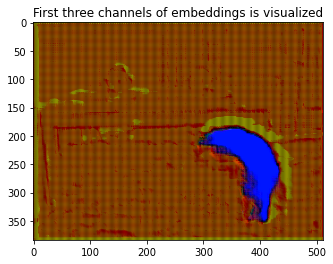

In [33]:
select_class = 2
print("class", classes[select_class], "is selected")
select_sample = 1
batch_data = get_named_dict(meta_data, select_class)
input_data = batch_data.val_data[select_sample].permute(1, 2, 0)
plt.title("First three channels of embeddings is visualized")
plt.imshow(input_data.cpu().detach().numpy()[:,:,:3])

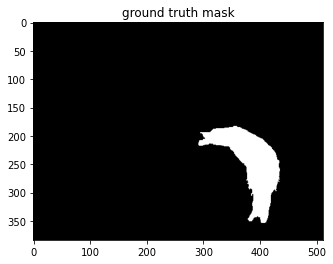

In [34]:
input_mask = batch_data.val_data_masks[select_sample]
plt.title("ground truth mask")
plt.imshow(input_mask.cpu().detach().numpy(), cmap="gray")

In [35]:
latents, kl_loss = leo.forward_encoder(batch_data.val_data)
_, _, predictions = leo.forward_decoder(batch_data.val_data, latents, batch_data.val_data_masks)

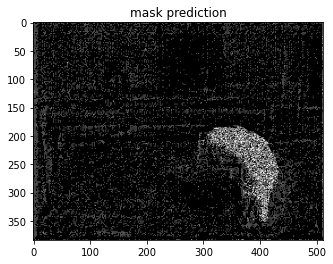

In [36]:
plt.title("mask prediction")
plt.imshow(np.argmax(predictions.cpu().detach().numpy()[select_sample], 0), cmap="gray")

In [27]:
predictions.shape

torch.Size([5, 2, 384, 512])